[  2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36
  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72
  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106 108
 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142 144
 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178 180
 182 184 186 188 190 192 194 196 198]
Cold Gas:
s: mean:  0.315 16th:  0.111 84th:  0.107
q: mean:  0.686 16th:  0.089 84th:  0.121
T: mean:  0.619 16th:  0.219 84th:  0.122
Stars:
s: mean:  0.5431341548277591 16th:  0.4095655732572438 84th:  0.6630464928340198
q: mean:  0.9129293244974035 16th:  0.8104599703602694 84th:  0.9570814837615669
T: mean:  0.27029167597329473 16th:  0.11575674366796677 84th:  0.4494358513658857


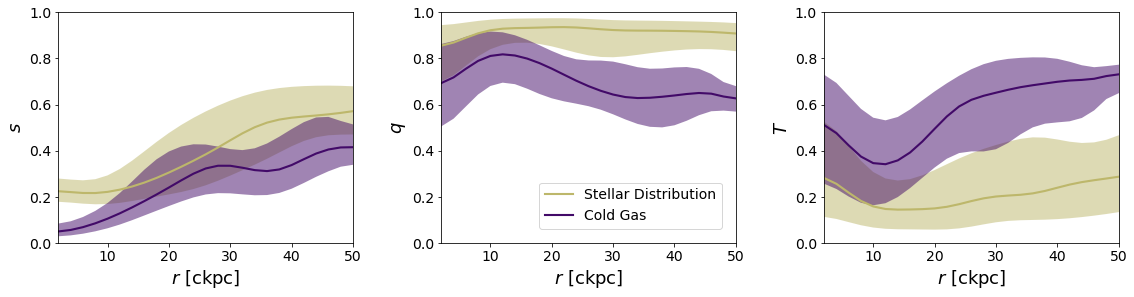

In [5]:
import matplotlib
#matplotlib.use('Agg')  # Add this when you want to make a plot in test part of the cluster runs!
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
import csv
from scipy import signal
from scipy.interpolate import interp1d
from scipy.signal import butter, filtfilt, iirdesign, zpk2tf, freqz
import matplotlib.mlab as mlab
import h5py
import scipy.fftpack
from scipy import interpolate
import matplotlib.font_manager as fm
import pylab as py
import scipy.special as sp
import os
import pdb
from matplotlib.pyplot import cm
from numpy import linalg as LA
import os
import pandas as pd    # Pandas library to find the shape!!
from scipy import stats
from scipy.stats import norm
import sys
#import jscatter as js
import numpy as np
from scipy.interpolate import LSQUnivariateSpline
from scipy.ndimage.filters import gaussian_filter1d


gal_identifier = ['476266', '478216', '479938', '480802', '485056', '488530', '494709', '497557', '501208', '501725', '502995', 
                  '503437', '505586', '506720', '509091', '510585', '511303', '513845', '519311', '522983', '523889', '529365', 
                  '530330', '535410', '538905']


x = []
y = []

def forceAspect(ax,aspect=1):
    im = ax.get_images()
    extent =  im[0].get_extent()
    ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)


"""
Code: Oct. 10
Goal: In this script, we shCold compute the radial profile of the median and percentiles of the shape for the stellar halo.
"""



#os.chdir("/n/holyscratch01/loeb_lab/remamimeibody/illustris_python/TNG50/")
Real_DISK_Gal = np.array([ 2,  4,  5,  6,  7, 10, 15, 17, 20, 21, 23, 24, 27, 29, 31, 34, 35, 39, 48, 52, 54, 57, 58, 63, 65])
## Here is the dictionary of the shape files, (rsph, s, q), where we have defined s and q as
## s = (1.0*csph)/asph and q = (1.0*bsph)/asph.



"""
Here we compute the shape using LSIM method in which we keep the enclosed volume fixed!!!
"""
####
######
#######
r_space1 = np.arange(2, 200, 2)  ## Please change this based on your numbers 10-200
r_space2 = np.arange(2, 200, 2)
####
######
#######

print(r_space1)

mean_s = []
standard_dev_s1 = []
standard_dev_s2 = []

mean_q = []
standard_dev_q1 = []
standard_dev_q2 = []

mean_T = []
standard_dev_T1 = []
standard_dev_T2 = []


path = '/Users/tw94/Desktop/SAO_REU'

for i in range(len(r_space1)-1):
    q_shape = []
    s_shape = []
    T_shape = []
    
    q_shape_SD = []
    s_shape_SD = []
    T_shape_SD = []
    for uu in range(len(Real_DISK_Gal)):
        try:
            j = Real_DISK_Gal[uu]
            rr1 = np.genfromtxt(path + '/new_outputs_0.5Tvir/Shape_Finder_Output_Cold_Gas_0.5Tvir/Gas_LSIM/shapeMW-principal3/shape_prin_'+str(j).zfill(3)+'.txt')
            
            #SFR = np.genfromtxt('/n/home08/twaters/gas_morphology/data/TNG50/SFRGas50/Gas_SFR_Gal'+str(i).zfill(3)+'.txt')
            
            shapee_s = []
            shaS  = []
            
            shapee_q = []
            shaQ  = []
            
            shapee_T = []
            shaT = []
            
            mask1 = rr1[:,0] >= r_space1[i]
            mask2 = rr1[:,0] <  r_space1[i+1]
            mask_tot = np.logical_and(mask1, mask2)
            ## 2 refers to q and 1 refers to s. 
            shaS = rr1[mask_tot, 1]
            shaQ = rr1[mask_tot, 2]
            ShaT = (1.0 - shaQ**2.0)/(1.0 - shaS**2.0)
            
            shapee_s = np.append(shapee_s, shaS)
            shapee_q = np.append(shapee_q, shaQ)
            shapee_T = np.append(shapee_T, ShaT)
            
            
            if len(shapee_s)> 0:
                s_shape = np.append(s_shape, shapee_s)
                q_shape = np.append(q_shape, shapee_q)
                T_shape = np.append(T_shape, shapee_T)
               

            else:
                pass
        except IOError:
              pass
    
    if len(q_shape) >0:
        #print(i,r_space1[i], len(q_shape), np.median(T_shape))
          
        mean_s = np.append(mean_s, [r_space1[i], np.median(s_shape)])
        mean_q = np.append(mean_q, [r_space1[i], np.median(q_shape)])
        mean_T = np.append(mean_T, [r_space1[i], np.median(T_shape)])
          
           
        standard_dev_s1 = np.append(standard_dev_s1, [r_space1[i], np.percentile(s_shape, 16)])
        standard_dev_q1 = np.append(standard_dev_q1, [r_space1[i], np.percentile(q_shape, 16)])
        standard_dev_T1 = np.append(standard_dev_T1, [r_space1[i], np.percentile(T_shape, 16)])
           
        standard_dev_s2 = np.append(standard_dev_s2, [r_space1[i], np.percentile(s_shape, 84)])
        standard_dev_q2 = np.append(standard_dev_q2, [r_space1[i], np.percentile(q_shape, 84)])
        standard_dev_T2 = np.append(standard_dev_T2, [r_space1[i], np.percentile(T_shape, 84)])

                
        
row_Shape_s = int(len(mean_s)/2.0)
Mean_vec_s = np.array(mean_s).reshape(row_Shape_s,2)

row_Shape_q = int(len(mean_q)/2.0)
Mean_vec_q = np.array(mean_q).reshape(row_Shape_q,2)

row_Shape_T = int(len(mean_T)/2.0)
Mean_vec_T = np.array(mean_T).reshape(row_Shape_T,2)

row_Shape_std_s1 = int(len(standard_dev_s1)/2.0)
Std_vec_s1 = np.array(standard_dev_s1).reshape(row_Shape_std_s1, 2)

row_Shape_std_s2 = int(len(standard_dev_s2)/2.0)
Std_vec_s2 = np.array(standard_dev_s2).reshape(row_Shape_std_s2, 2)

row_Shape_std_q1 = int(len(standard_dev_q1)/2.0)
Std_vec_q1 = np.array(standard_dev_q1).reshape(row_Shape_std_q1, 2)

row_Shape_std_q2 = int(len(standard_dev_q2)/2.0)
Std_vec_q2 = np.array(standard_dev_q2).reshape(row_Shape_std_q2, 2)

row_Shape_std_T1 = int(len(standard_dev_T1)/2.0)
Std_vec_T1 = np.array(standard_dev_T1).reshape(row_Shape_std_T1, 2)

row_Shape_std_T2 = int(len(standard_dev_T2)/2.0)
Std_vec_T2 = np.array(standard_dev_T2).reshape(row_Shape_std_T2, 2)

final_mean_s = np.median(Mean_vec_s[:,1])
final_std_s1 = np.median(Std_vec_s1[:,1])
final_std_s2 = np.median(Std_vec_s2[:,1])


final_mean_q = np.median(Mean_vec_q[:,1])
final_std_q1 = np.median(Std_vec_q1[:,1])
final_std_q2 = np.median(Std_vec_q2[:,1])


final_mean_T = np.median(Mean_vec_T[:,1])
final_std_T1 = np.median(Std_vec_T1[:,1])
final_std_T2 = np.median(Std_vec_T2[:,1])

print("Cold Gas:")
print("s:", "mean: ", np.round(final_mean_s,3), "16th: ", np.round(final_mean_s-final_std_s1,3), "84th: ", np.round(final_std_s2-final_mean_s,3))
print("q:", "mean: ", np.round(final_mean_q,3), "16th: ", np.round(final_mean_q-final_std_q1,3), "84th: ", np.round(final_std_q2-final_mean_q,3))
print("T:", "mean: ", np.round(final_mean_T,3), "16th: ", np.round(final_mean_T-final_std_T1,3), "84th: ", np.round(final_std_T2-final_mean_T,3))


##################################

"""
Here we compute the shape using LSIM method in which we keep the semi-majopr axes fixed!!!
"""

mean_s2 = []
standard_dev_s12 = []
standard_dev_s22 = []

mean_q2 = []
standard_dev_q12 = []
standard_dev_q22 = []


mean_T2 = []
standard_dev_T12 = []
standard_dev_T22 = []

cmap = plt.cm.get_cmap('inferno')
Cold = cmap(0.2)
Warm = cmap(0.5)
Hot = cmap(0.75)
All = 'midnightblue'

for i in range(len(r_space2)-1):
    q_shape2 = []
    s_shape2 = []
    T_shape2 = []
    for uu in range(len(Real_DISK_Gal)):
        #pdb.set_trace()
        try:
            j = Real_DISK_Gal[uu]
            rr1 = np.genfromtxt(path + '/new_outputs_0.5Tvir/Shape_Finder_Output_Cold_Gas_0.5Tvir/Gas_LSIM/shapeMW-principal3/shape_prin_'+str(j).zfill(3)+'.txt')
             
             
            shapee_s2 = []
            shaS2  = []
            
            shapee_q2 = []
            shaQ2  = []
            
            shapee_T2 = []
            shaT2 = []
            
            mask11 = rr1[:,0] >= r_space2[i]
            mask22 = rr1[:,0] <  r_space2[i+1]
            mask_tot2 = np.logical_and(mask11, mask22)
            ## 2 refers to q and 1 refers to s.
            shaS2 = rr1[mask_tot2, 1]
            shaQ2 = rr1[mask_tot2, 2]
            ShaT2 = (1.0 - shaQ2**2.0)/(1.0 - shaS2**2.0)
            
            
            shapee_s2 = np.append(shapee_s2, shaS2)
            shapee_q2 = np.append(shapee_q2, shaQ2)
            shapee_T2 = np.append(shapee_T2, ShaT2)
            
            
            if len(shapee_s2)> 0:
               s_shape2 = np.append(s_shape2, shapee_s2)
               q_shape2 = np.append(q_shape2, shapee_q2)
               T_shape2 = np.append(T_shape2, shapee_T2)
               
            else:
                pass

        except IOError:
              pass
    
    if len(q_shape2) >0:
        #print(i,r_space1[i], len(q_shape4), np.median(T_shape4))
          
        mean_s2 = np.append(mean_s2, [r_space2[i], np.median(s_shape2)])
        mean_q2 = np.append(mean_q2, [r_space2[i], np.median(q_shape2)])
        mean_T2 = np.append(mean_T2, [r_space2[i], np.median(T_shape2)])
          
           
        standard_dev_s12 = np.append(standard_dev_s12, [r_space2[i], np.percentile(s_shape2, 16)])
        standard_dev_q12 = np.append(standard_dev_q12, [r_space2[i], np.percentile(q_shape2, 16)])
        standard_dev_T12 = np.append(standard_dev_T12, [r_space2[i], np.percentile(T_shape2, 16)])
           
        standard_dev_s22 = np.append(standard_dev_s22, [r_space2[i], np.percentile(s_shape2, 84)])
        standard_dev_q22 = np.append(standard_dev_q22, [r_space2[i], np.percentile(q_shape2, 84)])
        standard_dev_T22 = np.append(standard_dev_T22, [r_space2[i], np.percentile(T_shape2, 84)])

 
row_Shape_s2 = int(len(mean_s2)/2.0)
Mean_vec_s2 = np.array(mean_s2).reshape(row_Shape_s2,2)

row_Shape_q2 = int(len(mean_q2)/2.0)
Mean_vec_q2 = np.array(mean_q2).reshape(row_Shape_q2,2)

row_Shape_T2 = int(len(mean_T2)/2.0)
Mean_vec_T2 = np.array(mean_T2).reshape(row_Shape_T2,2)


row_Shape_std_s12 = int(len(standard_dev_s12)/2.0)
Std_vec_s12 = np.array(standard_dev_s12).reshape(row_Shape_std_s12, 2)

row_Shape_std_s22 = int(len(standard_dev_s22)/2.0)
Std_vec_s22 = np.array(standard_dev_s22).reshape(row_Shape_std_s22, 2)


row_Shape_std_q12 = int(len(standard_dev_q12)/2.0)
Std_vec_q12 = np.array(standard_dev_q12).reshape(row_Shape_std_q12, 2)

row_Shape_std_q22 = int(len(standard_dev_q22)/2.0)
Std_vec_q22 = np.array(standard_dev_q22).reshape(row_Shape_std_q22, 2)


row_Shape_std_T12 = int(len(standard_dev_T12)/2.0)
Std_vec_T12 = np.array(standard_dev_T12).reshape(row_Shape_std_T12, 2)

row_Shape_std_T22 = int(len(standard_dev_T22)/2.0)
Std_vec_T22 = np.array(standard_dev_T22).reshape(row_Shape_std_T22, 2)


final_mean_s2 = np.median(Mean_vec_s2[:,1])
final_std_s12 = np.median(Std_vec_s12[:,1])
final_std_s22 = np.median(Std_vec_s22[:,1])


final_mean_q2 = np.median(Mean_vec_q2[:,1])
final_std_q12 = np.median(Std_vec_q12[:,1])
final_std_q22 = np.median(Std_vec_q22[:,1])


final_mean_T2 = np.median(Mean_vec_T2[:,1])
final_std_T12 = np.median(Std_vec_T12[:,1])
final_std_T22 = np.median(Std_vec_T22[:,1])

'''------------------------------------------------------------------------------------------------'''


mean_s_SD = []
standard_dev_s1_SD = []
standard_dev_s2_SD = []

mean_q_SD = []
standard_dev_q1_SD = []
standard_dev_q2_SD = []

mean_T_SD = []
standard_dev_T1_SD = []
standard_dev_T2_SD = []

for i in range(len(r_space1)-1):
    
    q_shape_SD = []
    s_shape_SD = []
    T_shape_SD = []
    for uu in range(len(Real_DISK_Gal)):
        try:
            j = Real_DISK_Gal[uu]

#
###
####
#######
#########
            rr2 = np.genfromtxt('/Users/tw94/Desktop/SAO_REU/shape_finder_outputs/Shape_Finder_Output_Stars/Stars_LSIM/shapeMW-principal3/shape_prin_'+str(j).zfill(3)+'.txt')
            
             
##########
########
####
###
#
            
            shapee_s_SD = []
            shaS_SD  = []
            
            shapee_q_SD = []
            shaQ_SD  = []
            
            shapee_T_SD = []
            shaT_SD = []
            
            mask1_SD = rr2[:,0] >= r_space1[i]
            mask2_SD = rr2[:,0] <  r_space1[i+1]
            mask_tot_SD = np.logical_and(mask1_SD, mask2_SD)
            ## 2 refers to q and 1 refers to s.
            shaS_SD = rr2[mask_tot_SD, 1]
            shaQ_SD = rr2[mask_tot_SD, 2]
            ShaT_SD = (1.0 - shaQ_SD**2.0)/(1.0 - shaS_SD**2.0)
            
            shapee_s_SD = np.append(shapee_s_SD, shaS_SD)
            shapee_q_SD = np.append(shapee_q_SD, shaQ_SD)
            shapee_T_SD = np.append(shapee_T_SD, ShaT_SD)
            
            
            if len(shapee_s_SD)> 0:
               s_shape_SD = np.append(s_shape_SD, shapee_s_SD)
               q_shape_SD = np.append(q_shape_SD, shapee_q_SD)
               T_shape_SD = np.append(T_shape_SD, shapee_T_SD)
               

            else:
                pass
        except IOError:
              pass
    
    if len(q_shape_SD) >0:
        #print(i,r_space1[i], len(q_shape), np.median(T_shape))
          
        mean_s_SD = np.append(mean_s_SD, [r_space1[i], np.median(s_shape_SD)])
        mean_q_SD = np.append(mean_q_SD, [r_space1[i], np.median(q_shape_SD)])
        mean_T_SD = np.append(mean_T_SD, [r_space1[i], np.median(T_shape_SD)])
          
           
        standard_dev_s1_SD = np.append(standard_dev_s1_SD, [r_space1[i], np.percentile(s_shape_SD, 16)])
        standard_dev_q1_SD = np.append(standard_dev_q1_SD, [r_space1[i], np.percentile(q_shape_SD, 16)])
        standard_dev_T1_SD = np.append(standard_dev_T1_SD, [r_space1[i], np.percentile(T_shape_SD, 16)])
           
        standard_dev_s2_SD = np.append(standard_dev_s2_SD, [r_space1[i], np.percentile(s_shape_SD, 84)])
        standard_dev_q2_SD = np.append(standard_dev_q2_SD, [r_space1[i], np.percentile(q_shape_SD, 84)])
        standard_dev_T2_SD = np.append(standard_dev_T2_SD, [r_space1[i], np.percentile(T_shape_SD, 84)])

                
        
row_Shape_s_SD = int(len(mean_s_SD)/2.0)
Mean_vec_s_SD = np.array(mean_s_SD).reshape(row_Shape_s_SD,2)

row_Shape_q_SD = int(len(mean_q_SD)/2.0)
Mean_vec_q_SD = np.array(mean_q_SD).reshape(row_Shape_q_SD,2)

row_Shape_T_SD = int(len(mean_T_SD)/2.0)
Mean_vec_T_SD = np.array(mean_T_SD).reshape(row_Shape_T_SD,2)

row_Shape_std_s1_SD = int(len(standard_dev_s1_SD)/2.0)
Std_vec_s1_SD = np.array(standard_dev_s1_SD).reshape(row_Shape_std_s1_SD, 2)

row_Shape_std_s2_SD = int(len(standard_dev_s2_SD)/2.0)
Std_vec_s2_SD = np.array(standard_dev_s2_SD).reshape(row_Shape_std_s2_SD, 2)

row_Shape_std_q1_SD = int(len(standard_dev_q1_SD)/2.0)
Std_vec_q1_SD = np.array(standard_dev_q1_SD).reshape(row_Shape_std_q1_SD, 2)

row_Shape_std_q2_SD = int(len(standard_dev_q2_SD)/2.0)
Std_vec_q2_SD = np.array(standard_dev_q2_SD).reshape(row_Shape_std_q2_SD, 2)

row_Shape_std_T1_SD = int(len(standard_dev_T1_SD)/2.0)
Std_vec_T1_SD = np.array(standard_dev_T1_SD).reshape(row_Shape_std_T1_SD, 2)

row_Shape_std_T2_SD = int(len(standard_dev_T2_SD)/2.0)
Std_vec_T2_SD = np.array(standard_dev_T2_SD).reshape(row_Shape_std_T2_SD, 2)

final_mean_s_SD = np.median(Mean_vec_s_SD[:,1])
final_std_s1_SD = np.median(Std_vec_s1_SD[:,1])
final_std_s2_SD = np.median(Std_vec_s2_SD[:,1])


final_mean_q_SD = np.median(Mean_vec_q_SD[:,1])
final_std_q1_SD = np.median(Std_vec_q1_SD[:,1])
final_std_q2_SD = np.median(Std_vec_q2_SD[:,1])


final_mean_T_SD = np.median(Mean_vec_T_SD[:,1])
final_std_T1_SD = np.median(Std_vec_T1_SD[:,1])
final_std_T2_SD = np.median(Std_vec_T2_SD[:,1])


print("Stars:")
print("s:", "mean: ", final_mean_s_SD, "16th: ", final_std_s1_SD, "84th: ", final_std_s2_SD)
print("q:", "mean: ", final_mean_q_SD, "16th: ", final_std_q1_SD, "84th: ", final_std_q2_SD)
print("T:", "mean: ", final_mean_T_SD, "16th: ", final_std_T1_SD, "84th: ", final_std_T2_SD)


##################################

"""
Here we compute the shape using LSIM method in which we keep the semi-majopr axes fixed!!!
"""

mean_s2_SD = []
standard_dev_s12_SD = []
standard_dev_s22_SD = []

mean_q2_SD = []
standard_dev_q12_SD = []
standard_dev_q22_SD = []


mean_T2_SD = []
standard_dev_T12_SD = []
standard_dev_T22_SD = []


for i in range(len(r_space2)-1):
    q_shape2_SD = []
    s_shape2_SD = []
    T_shape2_SD = []
    for uu in range(len(Real_DISK_Gal)):
        #pdb.set_trace()
        try:
            j = Real_DISK_Gal[uu]
            
#
###
#####
########
##########
            rr2 = np.genfromtxt('/Users/tw94/Desktop/SAO_REU/shape_finder_outputs/Shape_Finder_Output_Stars/Stars_LSIM/shapeMW-principal3/shape_prin_'+str(j).zfill(3)+'.txt')
            
             
###########
#########
######
###
#

            shapee_s2_SD = []
            shaS2_SD  = []
            
            shapee_q2_SD = []
            shaQ2_SD  = []
            
            shapee_T2_SD = []
            shaT2_SD = []
            
            mask11_SD = rr2[:,0] >= r_space2[i]
            mask22_SD = rr2[:,0] <  r_space2[i+1]
            mask_tot2_SD = np.logical_and(mask11_SD, mask22_SD)
            ## 2 refers to q and 1 refers to s.
            shaS2_SD = rr2[mask_tot2_SD, 1]
            shaQ2_SD = rr2[mask_tot2_SD, 2]
            ShaT2_SD = (1.0 - shaQ2_SD**2.0)/(1.0 - shaS2_SD**2.0)
            
            
            shapee_s2_SD = np.append(shapee_s2_SD, shaS2_SD)
            shapee_q2_SD = np.append(shapee_q2_SD, shaQ2_SD)
            shapee_T2_SD = np.append(shapee_T2_SD, ShaT2_SD)
            
            
            if len(shapee_s2_SD)> 0:
               s_shape2_SD = np.append(s_shape2_SD, shapee_s2_SD)
               q_shape2_SD = np.append(q_shape2_SD, shapee_q2_SD)
               T_shape2_SD = np.append(T_shape2_SD, shapee_T2_SD)
               
            else:
                pass

        except IOError:
              pass
    
    if len(q_shape2_SD) >0:
        #print(i,r_space1[i], len(q_shape4), np.median(T_shape4))
          
        mean_s2_SD = np.append(mean_s2_SD, [r_space2[i], np.median(s_shape2_SD)])
        mean_q2_SD = np.append(mean_q2_SD, [r_space2[i], np.median(q_shape2_SD)])
        mean_T2_SD = np.append(mean_T2_SD, [r_space2[i], np.median(T_shape2_SD)])
          
           
        standard_dev_s12_SD = np.append(standard_dev_s12_SD, [r_space2[i], np.percentile(s_shape2_SD, 16)])
        standard_dev_q12_SD = np.append(standard_dev_q12_SD, [r_space2[i], np.percentile(q_shape2_SD, 16)])
        standard_dev_T12_SD = np.append(standard_dev_T12_SD, [r_space2[i], np.percentile(T_shape2_SD, 16)])
           
        standard_dev_s22_SD = np.append(standard_dev_s22_SD, [r_space2[i], np.percentile(s_shape2_SD, 84)])
        standard_dev_q22_SD = np.append(standard_dev_q22_SD, [r_space2[i], np.percentile(q_shape2_SD, 84)])
        standard_dev_T22_SD = np.append(standard_dev_T22_SD, [r_space2[i], np.percentile(T_shape2_SD, 84)])

 
row_Shape_s2_SD = int(len(mean_s2_SD)/2.0)
Mean_vec_s2_SD = np.array(mean_s2_SD).reshape(row_Shape_s2_SD,2)

row_Shape_q2_SD = int(len(mean_q2_SD)/2.0)
Mean_vec_q2_SD = np.array(mean_q2_SD).reshape(row_Shape_q2_SD,2)

row_Shape_T2_SD = int(len(mean_T2_SD)/2.0)
Mean_vec_T2_SD = np.array(mean_T2_SD).reshape(row_Shape_T2_SD,2)


row_Shape_std_s12_SD = int(len(standard_dev_s12_SD)/2.0)
Std_vec_s12_SD = np.array(standard_dev_s12_SD).reshape(row_Shape_std_s12_SD, 2)

row_Shape_std_s22_SD = int(len(standard_dev_s22_SD)/2.0)
Std_vec_s22_SD = np.array(standard_dev_s22_SD).reshape(row_Shape_std_s22_SD, 2)


row_Shape_std_q12_SD = int(len(standard_dev_q12_SD)/2.0)
Std_vec_q12_SD = np.array(standard_dev_q12_SD).reshape(row_Shape_std_q12_SD, 2)

row_Shape_std_q22_SD = int(len(standard_dev_q22_SD)/2.0)
Std_vec_q22_SD = np.array(standard_dev_q22_SD).reshape(row_Shape_std_q22_SD, 2)


row_Shape_std_T12_SD = int(len(standard_dev_T12_SD)/2.0)
Std_vec_T12_SD = np.array(standard_dev_T12_SD).reshape(row_Shape_std_T12_SD, 2)

row_Shape_std_T22_SD = int(len(standard_dev_T22_SD)/2.0)
Std_vec_T22_SD = np.array(standard_dev_T22_SD).reshape(row_Shape_std_T22_SD, 2)


final_mean_s2_SD = np.median(Mean_vec_s2_SD[:,1])
final_std_s12_SD = np.median(Std_vec_s12_SD[:,1])
final_std_s22_SD = np.median(Std_vec_s22_SD[:,1])


final_mean_q2_SD = np.median(Mean_vec_q2_SD[:,1])
final_std_q12_SD = np.median(Std_vec_q12_SD[:,1])
final_std_q22_SD = np.median(Std_vec_q22_SD[:,1])


final_mean_T2_SD = np.median(Mean_vec_T2_SD[:,1])
final_std_T12_SD = np.median(Std_vec_T12_SD[:,1])
final_std_T22_SD = np.median(Std_vec_T22_SD[:,1])


'''------------------------------------------------------------------------------------------------'''

fig=plt.figure(figsize=(19,2))
ax = plt.subplot(1,3,1)
plt.subplots_adjust(top =1.8, bottom=0.2,hspace=0.3, wspace=0.3)



ysmoothed_min_mean = gaussian_filter1d(Mean_vec_s[:, 1], sigma=2)
ysmoothed_min_std1 = gaussian_filter1d(Std_vec_s1[:,1], sigma=2)
ysmoothed_min_std2 = gaussian_filter1d(Std_vec_s2[:,1], sigma=2)

ysmoothed_min_mean_SD = gaussian_filter1d(Mean_vec_s_SD[:, 1], sigma=2)
ysmoothed_min_std1_SD = gaussian_filter1d(Std_vec_s1_SD[:,1], sigma=2)
ysmoothed_min_std2_SD = gaussian_filter1d(Std_vec_s2_SD[:,1], sigma=2)

ax.plot(Mean_vec_s_SD[:,0], ysmoothed_min_std1_SD, c='darkkhaki',linestyle='-',alpha=0.3, markeredgewidth=5, linewidth=0, markersize=12)
ax.plot(Mean_vec_s_SD[:,0], ysmoothed_min_std2_SD, c='darkkhaki',linestyle='-',alpha=0.3, markeredgewidth=5, linewidth=0, markersize=12)
ax.plot(Mean_vec_s_SD[:,0], ysmoothed_min_mean_SD, c='darkkhaki',linestyle='-',alpha=1.0, markeredgewidth=5, linewidth=2.1, markersize=12, label= r'Stellar Distribution')
ax.fill_between(Mean_vec_s_SD[:, 0], ysmoothed_min_mean_SD, ysmoothed_min_std2_SD, facecolor='darkkhaki', interpolate=True, alpha=0.5)
ax.fill_between(Mean_vec_s_SD[:, 0], ysmoothed_min_mean_SD, ysmoothed_min_std1_SD, facecolor='darkkhaki', interpolate=True, alpha=0.5)

ax.plot(Mean_vec_s[:,0], ysmoothed_min_std1, c=Cold,linestyle='-',alpha=0.3, markeredgewidth=5, linewidth=0, markersize=12)
ax.plot(Mean_vec_s[:,0], ysmoothed_min_std2, c=Cold,linestyle='-',alpha=0.3, markeredgewidth=5, linewidth=0, markersize=12)
ax.plot(Mean_vec_s[:,0], ysmoothed_min_mean, c=Cold,linestyle='-',alpha=1.0, markeredgewidth=5, linewidth=2.1, markersize=12, label= r'Cold Gas')
ax.fill_between(Mean_vec_s[:, 0], ysmoothed_min_mean, ysmoothed_min_std2, facecolor=Cold, interpolate=True, alpha=0.5)
ax.fill_between(Mean_vec_s[:, 0], ysmoothed_min_mean,ysmoothed_min_std1, facecolor=Cold, interpolate=True, alpha=0.5)


ysmoothed2_min_mean = gaussian_filter1d(Mean_vec_s2[:, 1], sigma=2)
ysmoothed2_min_std1 = gaussian_filter1d(Std_vec_s12[:,1], sigma=2)
ysmoothed2_min_std2 = gaussian_filter1d(Std_vec_s22[:,1], sigma=2)

ysmoothed2_min_mean_SD = gaussian_filter1d(Mean_vec_s2_SD[:, 1], sigma=2)
ysmoothed2_min_std1_SD = gaussian_filter1d(Std_vec_s12_SD[:,1], sigma=2)
ysmoothed2_min_std2_SD = gaussian_filter1d(Std_vec_s22_SD[:,1], sigma=2)


plt.tick_params(axis='both', which='major', labelsize=14)
axes = plt.gca()
#legend = plt.legend(loc=2, borderaxespad=1., ncol=1,numpoints=1,fontsize = 10,fancybox=True)
ax.set_aspect('auto')

plt.ylabel(r'$s$',fontsize=18)
plt.xlabel(r'$r$ [ckpc]', fontsize=18)
axes.set_xlim([2, 50]) #150 for wg, hg, ag. 50 for cg
axes.set_ylim([0.0, 1.0])

ax = plt.subplot(1,3,2)
plt.subplots_adjust(top =1.8, bottom=0.2,hspace=0.3, wspace=0.3)
#ax.set_title('Hot Gas', fontsize = 20)


ysmoothed_min_mean = gaussian_filter1d(Mean_vec_q[:, 1], sigma=2)
ysmoothed_min_std1 = gaussian_filter1d(Std_vec_q1[:,1], sigma=2)
ysmoothed_min_std2 = gaussian_filter1d(Std_vec_q2[:,1], sigma=2)

ysmoothed_min_mean_SD = gaussian_filter1d(Mean_vec_q_SD[:, 1], sigma=2)
ysmoothed_min_std1_SD = gaussian_filter1d(Std_vec_q1_SD[:,1], sigma=2)
ysmoothed_min_std2_SD = gaussian_filter1d(Std_vec_q2_SD[:,1], sigma=2)

ax.plot(Mean_vec_q_SD[:,0], ysmoothed_min_std1_SD, c='darkkhaki',linestyle='-',alpha=0.3, markeredgewidth=5, linewidth=0, markersize=12)
ax.plot(Mean_vec_q_SD[:,0], ysmoothed_min_std2_SD, c='darkkhaki',linestyle='-',alpha=0.3, markeredgewidth=5, linewidth=0, markersize=12)
ax.plot(Mean_vec_q_SD[:,0], ysmoothed_min_mean_SD, c='darkkhaki',linestyle='-',alpha=1.0, markeredgewidth=5, linewidth=2.1, markersize=12, label= r'Stellar Distribution')
ax.fill_between(Mean_vec_q_SD[:, 0], ysmoothed_min_mean_SD, ysmoothed_min_std2_SD, facecolor='darkkhaki', interpolate=True, alpha=0.5)
ax.fill_between(Mean_vec_q_SD[:, 0], ysmoothed_min_mean_SD, ysmoothed_min_std1_SD, facecolor='darkkhaki', interpolate=True, alpha=0.5)

ax.plot(Mean_vec_q[:,0], ysmoothed_min_std1, c=Cold,linestyle='-',alpha=0.3, markeredgewidth=5, linewidth=0, markersize=12)
ax.plot(Mean_vec_q[:,0], ysmoothed_min_std2, c=Cold,linestyle='-',alpha=0.3, markeredgewidth=5, linewidth=0, markersize=12)
ax.plot(Mean_vec_q[:,0], ysmoothed_min_mean, c=Cold,linestyle='-',alpha=1.0, markeredgewidth=5, linewidth=2.1, markersize=12, label= r'Cold Gas')
ax.fill_between(Mean_vec_q[:, 0], ysmoothed_min_mean, ysmoothed_min_std2, facecolor=Cold, interpolate=True, alpha=0.5)
ax.fill_between(Mean_vec_q[:, 0], ysmoothed_min_mean,ysmoothed_min_std1, facecolor=Cold, interpolate=True, alpha=0.5)

ysmoothed2_min_mean = gaussian_filter1d(Mean_vec_q2[:, 1], sigma=2)
ysmoothed2_min_std1 = gaussian_filter1d(Std_vec_q12[:,1], sigma=2)
ysmoothed2_min_std2 = gaussian_filter1d(Std_vec_q22[:,1], sigma=2)

ysmoothed2_min_mean_SD = gaussian_filter1d(Mean_vec_q2_SD[:, 1], sigma=2)
ysmoothed2_min_std1_SD = gaussian_filter1d(Std_vec_q12_SD[:,1], sigma=2)
ysmoothed2_min_std2_SD = gaussian_filter1d(Std_vec_q22_SD[:,1], sigma=2)


plt.tick_params(axis='both', which='major', labelsize=14)
axes = plt.gca()
legend = plt.legend(prop = {'size':14}, loc=4, borderaxespad=1., ncol=1,numpoints=1,fontsize = 10,fancybox=True)

plt.ylabel(r'$q$', fontsize=18)
plt.xlabel(r'$r$ [ckpc]', fontsize=18)
axes.set_xlim([2, 50])
axes.set_ylim([0.0, 1.0])


ax = plt.subplot(1,3,3)
plt.subplots_adjust(top =1.8, bottom=0.2,hspace=0.3, wspace=0.3)


ysmoothed_min_mean = gaussian_filter1d(Mean_vec_T[:, 1], sigma=2)
ysmoothed_min_std1 = gaussian_filter1d(Std_vec_T1[:,1], sigma=2)
ysmoothed_min_std2 = gaussian_filter1d(Std_vec_T2[:,1], sigma=2)

ysmoothed_min_mean_SD = gaussian_filter1d(Mean_vec_T_SD[:, 1], sigma=2)
ysmoothed_min_std1_SD = gaussian_filter1d(Std_vec_T1_SD[:,1], sigma=2)
ysmoothed_min_std2_SD = gaussian_filter1d(Std_vec_T2_SD[:,1], sigma=2)

ax.plot(Mean_vec_T_SD[:,0], ysmoothed_min_std1_SD, c='darkkhaki',linestyle='-',alpha=0.45, markeredgewidth=5, linewidth=0, markersize=12)
ax.plot(Mean_vec_T_SD[:,0], ysmoothed_min_std2_SD, c='darkkhaki',linestyle='-',alpha=0.45, markeredgewidth=5, linewidth=0, markersize=12)
ax.plot(Mean_vec_T_SD[:,0], ysmoothed_min_mean_SD, c='darkkhaki',linestyle='-',alpha=1.0, markeredgewidth=5, linewidth=2.1, markersize=12, label= r'Stellar Distribution')
ax.fill_between(Mean_vec_T_SD[:, 0], ysmoothed_min_mean_SD, ysmoothed_min_std2_SD, facecolor='darkkhaki', interpolate=True, alpha=0.5)
ax.fill_between(Mean_vec_T_SD[:, 0], ysmoothed_min_mean_SD, ysmoothed_min_std1_SD, facecolor='darkkhaki', interpolate=True, alpha=0.5)
ax.set_aspect('auto')

ax.plot(Mean_vec_T[:,0], ysmoothed_min_std1, c=Cold,linestyle='-',alpha=0.45, markeredgewidth=5, linewidth=0, markersize=12)
ax.plot(Mean_vec_T[:,0], ysmoothed_min_std2, c=Cold,linestyle='-',alpha=0.45, markeredgewidth=5, linewidth=0, markersize=12)
ax.plot(Mean_vec_T[:,0], ysmoothed_min_mean, c=Cold,linestyle='-',alpha=1.0, markeredgewidth=5, linewidth=2.1, markersize=12, label= r'Cold Gas')
ax.fill_between(Mean_vec_T[:, 0], ysmoothed_min_mean, ysmoothed_min_std2, facecolor=Cold, interpolate=True, alpha=0.5)
ax.fill_between(Mean_vec_T[:, 0], ysmoothed_min_mean,ysmoothed_min_std1, facecolor=Cold, interpolate=True, alpha=0.5)
ax.set_aspect('auto')

ysmoothed2_min_mean = gaussian_filter1d(Mean_vec_T2[:, 1], sigma=2)
ysmoothed2_min_std1 = gaussian_filter1d(Std_vec_T12[:,1], sigma=2)
ysmoothed2_min_std2 = gaussian_filter1d(Std_vec_T22[:,1], sigma=2)

ysmoothed2_min_mean_SD = gaussian_filter1d(Mean_vec_T2_SD[:, 1], sigma=2)
ysmoothed2_min_std1_SD = gaussian_filter1d(Std_vec_T12_SD[:,1], sigma=2)
ysmoothed2_min_std2_SD = gaussian_filter1d(Std_vec_T22_SD[:,1], sigma=2)

plt.tick_params(axis='both', which='major', labelsize=14)
axes = plt.gca()
#legend = plt.legend(loc=2, borderaxespad=1., ncol=1,numpoints=1,fontsize = 10,fancybox=True)

plt.ylabel(r'$T$',fontsize=18)
plt.xlabel(r'$r$ [ckpc]', fontsize=18)
axes.set_xlim([2, 50])
axes.set_ylim([0.0, 1.0])
#plt.xscale('log')

plt.savefig(path + '/new_outputs_0.5Tvir/mean_plots/Shape_sqT_Cold_fin.pdf',dpi = 400, transparent = True,bbox_inches='tight')

plt.show()


In [36]:
0.3047304242889306 - 0.22091344342841324 ,  0.44163401952631515 - 0.3047304242889306

(0.08381698086051736, 0.13690359523738455)